In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/labeled_data.csv")
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df.isna().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
import nltk

from nltk.stem import PorterStemmer

nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    words = [stemmer.stem(word) for word in text.split() if not word.lower() in stop_words]
    return ''.join(words)

df['processed_text'] = df['tweet'].apply(preprocess_text)

In [ ]:
df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,processed_text
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!!rt@mayasolovely:womancomplaincleanhouse.&am...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!!rt@mleew17:boydatcold...tygadwnbadcuffind...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!!rt@urkindofbranddawg!!!!rt@80sbaby4life...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!!rt@c_g_anderson:@viva_baslookliketranni
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!!rt@shenikaroberts:shithearmighttr...


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['processed_text'], df['count'], test_size= 0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
X_test_tfidf = tfidf_vectorizer.transform(x_test)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = rf_classifier.predict(X_test_tfidf)
accuracy_1 = accuracy_score(y_test, y_pred)
print("validation score : {:.4f}%".format(accuracy_1 * 100))


validation score : 91.7087%


In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')

svm_classifier.fit(X_train_tfidf, y_train)

y_pred = svm_classifier.predict(X_test_tfidf)

In [ ]:
accuracy_2 = accuracy_score(y_test, y_pred)
print("Accuracy : {:.4f}%".format(accuracy_2*100))

Accuracy : 92.4753%


In [ ]:
import time

start_time = time.time()
rf_classifier.fit(X_train_tfidf,y_train)
end_time = time.time()

rf_classifier_training_time = end_time - start_time
print("Training time:", rf_classifier_training_time, "seconds")


Training time: 22.055508852005005 seconds


In [ ]:
start_time = time.time()
svm_classifier.fit(X_train_tfidf, y_train)
end_time = time.time()

SVM_training_time = end_time - start_time
print("Training time:", SVM_training_time, "seconds")


Training time: 8.281005620956421 seconds


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores_1 = cross_val_score(rf_classifier, X_train_tfidf, y_train, cv=3)
print("Cross-validation scores:", cv_scores_1)
print("Mean CV accuracy:", cv_scores_1.mean())


Cross-validation scores: [0.90800424 0.91239219 0.91328692]
Mean CV accuracy: 0.9112277846837614


In [ ]:
cv_scores_2 = cross_val_score(svm_classifier, X_train_tfidf, y_train, cv=3)
print("Cross-validation scores:", cv_scores_2)
print("Mean CV accuracy:", cv_scores_2.mean())


Cross-validation scores: [0.91799062 0.91829324 0.91767554]
Mean CV accuracy: 0.9179864667143186


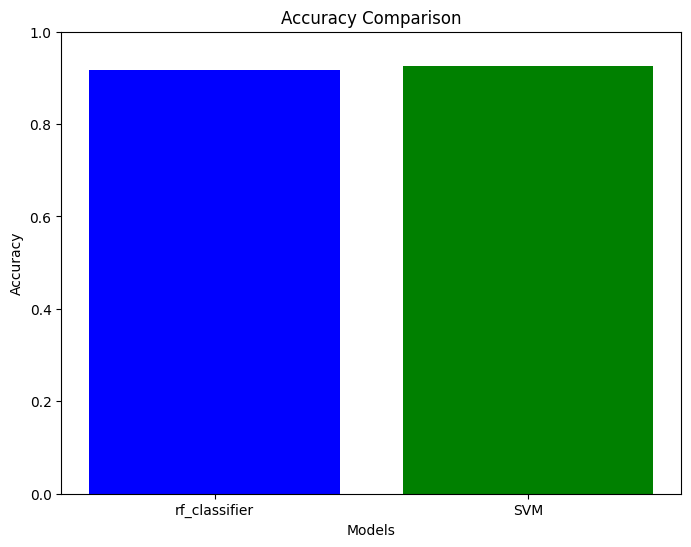

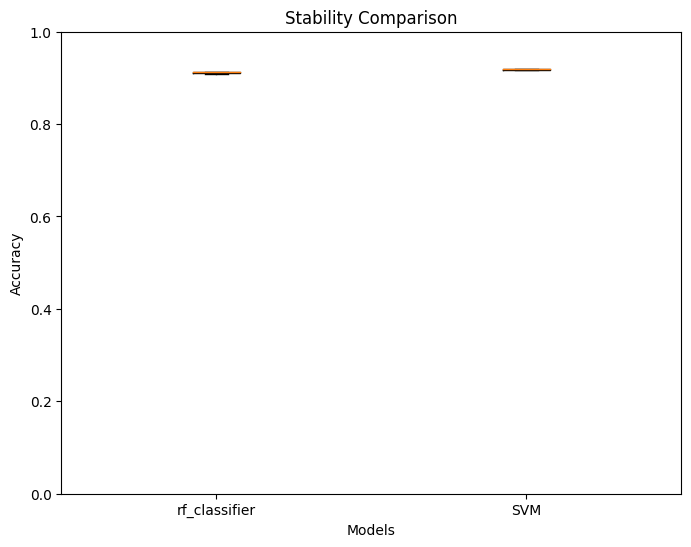

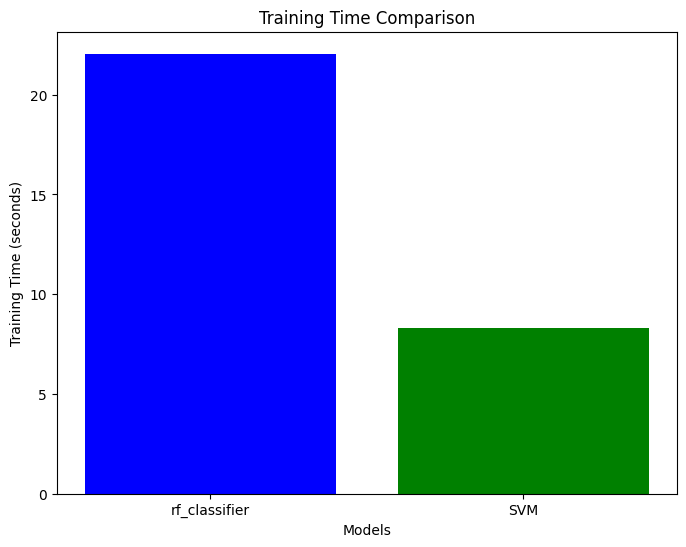

In [ ]:
import matplotlib.pyplot as plt

# Accuracy Comparison
models = ['rf_classifier', 'SVM']
accuracies = [accuracy_1, accuracy_2]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

# Stability Comparison (using box plot)
stability_data = [cv_scores_1, cv_scores_2]
plt.figure(figsize=(8, 6))
plt.boxplot(stability_data, labels=models)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Stability Comparison')
plt.ylim(0, 1)
plt.show()

# Training Time Comparison
training_times = [rf_classifier_training_time, SVM_training_time]

plt.figure(figsize=(8, 6))
plt.bar(models, training_times, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison')
plt.show()
